# COGS 189 - Final Project

How to set up this file...
You need to download the HUGE .mat files to be able to unpack the four 'cnt' files which are in the zipped up .mat files. The rest of the csv files can also found in this google drive. You will need all of these files in order to access all the data in this file. 

Note: The .mat files take a while to download, they can only be found in the google drive. I could not upload them to github because they were too large.

Note: When you drop the csv files in do not put them in seperate folders, unless you want to do unnecessary coding. In fact all files should be freely in place of the same folder as this jupyter notebook. 

Note: You will also want to read the PDF to understand what all this data means...(Something i still need to do)

THINGS THAT NEED TO BE DONE NEXT
    1.) The data has been untangled, it now needs to be placed back into a workable order.
    2.) The data needs to be cleaned (not sure what exactly this means, but we'll figure that out)
    3.) We need to get a summary and report of the PDF (again, its in the google drive)
    
       Lets try to get those 1 done by tomorrow, 2 done by saturday, and 3 done by sunday,
       Then, we can spend last 5 days on analysis

Google Drive
https://drive.google.com/drive/u/1/folders/1v7q29_rTfX2qLDxwuj7V3H4Nv60mg_67

Data set IVa
http://www.bbci.de/competition/iii/desc_IVa.html

### Experimental Setup
This data set was recorded from five healthy subjects. Subjects sat in a comfortable chair with arms resting on armrests. This data set contains only data from the 4 initial sessions without feedback. Visual cues indicated for 3.5 s which of the following 3 motor imageries the subject should perform: (L) left hand, (R) right hand, (F) right foot. The presentation of target cues were intermitted by periods of random length, 1.75 to 2.25 s, in which the subject could relax.

There were two types of visual stimulation:
        
        (1) where targets were indicated by letters appearing behind a fixation cross (which might nevertheless induce little target-correlated eye movements)
        (2) where a randomly moving object indicated targets (inducing target-uncorrelated eye movements). 

From subjects al and aw 2 sessions of both types were recorded, while from the other subjects 3 sessions of type (2) and 1 session of type (1) were recorded.

### Format of the Data
Given are continuous signals of 118 EEG channels and markers that indicate the time points of 280 cues for each of the 5 subjects (aa, al, av, aw, ay). For some markers no target class information is provided (value NaN) for competition purpose. Only cues for the classes 'right' and 'foot' are provided for the competition. The following table shows the respective number of training (labelled) trials "#tr" and test (unlabelled) trials "#te" for each subject.

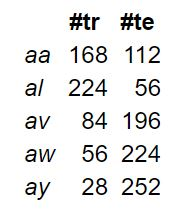

### Imports

In [1]:
import scipy.io
import pandas as pd
import numpy as np
import random
import csv

### Constants

This information came from the paper, and can be applied to all of the data.

In [2]:
fs = 1000
#This data set was recorded from five healthy subjects.
num_subjects = 5
#This data set contains only data from the 4 initial sessions without feedback.
num_sessions = 4
#Visual cues indicated for 3.5 s which of the following 3 motor imageries the subject
# should perform: (L) left hand, (R) right hand, (F) right foot.
visual_cue_time = 3.5
motor_imagery = ['left hand','right hand','right foot']
# The presentation of target cues were intermitted by periods of random length, 1.75 to 2.25 s, 
# in which the subject could relax.
target_cues = random.uniform(1.75, 2.25)
num_EEG_channels = 118
num_cues = 280
subject_marker =  ['aa','al','av','aw','ay']

### Helper Functions 

In [3]:
# The data in the 'cnt' file needs to be converted, this is a helper function to do that
def Int16_to_Double(df):
    df = np.double(df)*0.1
    df = pd.DataFrame(df)
    return df

In [4]:
#Helper Function to turn csv file into list 
def csv_to_list(csv_file):
    with open(csv_file, newline='') as f:
        reader = csv.reader(f)
        list_data = list(reader)
    return list_data

In [5]:
#This simplifies the lists in the data, removes nested lists
def simple_list_H(data_set):
    clab_list = []
    for i in range(len(data_set_IVa_aa_nfo_clab[0])):
        clab_list.append(data_set_IVa_aa_nfo_clab[0][i])
    
    return clab_list

In [6]:
def simple_list_V(dataset):
    _list_ = []
    for i in range(len(dataset)):
        _list_.append(dataset[i][0])

    return _list_

In [7]:
# Create mrk Data frame
def mrk_df(pos,y):
    pos = pos[0]
    y = y[0]
    
    data_set_mrk = pd.DataFrame(
    {'pos': data_set_IVa_aa_mrk_pos,
     'y': data_set_IVa_aa_mrk_y
    })
    return data_set_mrk

In [8]:
# Create nfo data frame
def nfo_df(clab,xpos,ypos):
    clab = simple_list_H(clab)
    xpos = simple_list_V(xpos)
    ypos = simple_list_V(ypos)

    data_set_nfo = pd.DataFrame(
        {'clab': clab,
         'xpos': xpos,
         'ypos': ypos
        })
    
    return data_set_nfo

In [9]:
# This will pull out the data from the mat file and set it to a dataframe
# Then it will convert the data from int16 to doubles
def cnt_df(dataset):
    cnt = dataset
    # convert numpy array to dataframe 
    dataset_df  = pd.DataFrame(cnt)
    dataset_df = Int16_to_Double(dataset_df)
    return dataset_df

### Helper Functions for MAT FILE 

In [10]:
# cnt
def get_cnt(data):
    cnt = np.double(data['cnt'][0])*0.1
    return cnt

In [11]:
# nfo 
def get_Name(data):
    name = data['nfo'][0][0][0][0]
    return name

In [12]:
# nfo 
def get_frequency(data):
    frequency = data['nfo'][0][0][1][0][0]
    return frequency

In [13]:
# nfo
def get_clab(data):
    clab_data = []
    for i in range(118):
        clab_data.append(data['nfo'][0][0][2][0][i][0])

    return clab_data

In [14]:
# nfo
def get_xpos(data):
    # x pos data_set_IVa_ay['nfo'][0][0][3][i][0]
    x_pos = []
    for i in range(118):
        x_pos.append(data['nfo'][0][0][2][0][i][0])

    return x_pos

In [15]:
# nfo
def get_ypos(data):
    y_pos = []
    for i in range(118):
        y_pos.append(data['nfo'][0][0][4][i][0])

    return y_pos

In [16]:
# mrk
def get_y(data):
    y = []
    for i in range(280):
        y.append(data['mrk'][0][0][1][0][i])
    return y 

In [17]:
# mrk
def get_className(data):
    class_name = []
    for i in range(2):
        class_name.append(data['mrk'][0][0][2][0][i][0])

    return class_name

In [18]:
# mrk 
def get_pos(data):
    pos = []
    for i in range(280):
        pos.append(data['mrk'][0][0][0][0][i])

    return pos

##### This is an explantion of how the files were organized, the actual names in here are identical to the real name to call the data

### Import Files

This is the .mat files

In [19]:
data_set_IVa_aw = scipy.io.loadmat('data_set_IVa_aw.mat')
data_set_IVa_av = scipy.io.loadmat('data_set_IVa_av.mat')
data_set_IVa_al = scipy.io.loadmat('data_set_IVa_al.mat')
data_set_IVa_aa = scipy.io.loadmat('data_set_IVa_aa.mat')
data_set_IVa_ay = scipy.io.loadmat('data_set_IVa_ay.mat')

In [20]:
# Untangled data directly from mat files
data_set_IVa_ay_cnt = get_cnt(data_set_IVa_ay)
data_set_IVa_ay_name = get_Name(data_set_IVa_ay)
data_set_IVa_ay_fs = get_frequency(data_set_IVa_ay)
data_set_IVa_ay_clab = get_clab(data_set_IVa_ay)
data_set_IVa_ay_xpos = get_xpos(data_set_IVa_ay)
data_set_IVa_ay_ypos = get_ypos(data_set_IVa_ay)
data_set_IVa_ay_y = get_y(data_set_IVa_ay)
data_set_IVa_ay_className = get_className(data_set_IVa_ay)
data_set_IVa_ay_pos = get_pos(data_set_IVa_ay)

This is the same data from the mat file but just broken into individual csv file, EXCLUDING the 'cnt' files

In [21]:
# # Dataset_IVa_aw
# Data from within mrk from data_set_IVa_aw
data_set_IVa_aw_mrk_pos=csv_to_list("data_set_IVa_aw_mrk_pos.csv")
data_set_IVa_aw_mrk_className=csv_to_list("data_set_IVa_aw_mrk_className.csv")
data_set_IVa_aw_mrk_y=csv_to_list("data_set_IVa_aw_mrk_y.csv")
# Data from within nfo from data_set_IVa_aw
data_set_IVa_aw_nfo_clab=csv_to_list("data_set_IVa_aw_nfo_clab.csv")
data_set_IVa_aw_nfo_ypos=csv_to_list("data_set_IVa_aw_nfo_ypos.csv")
data_set_IVa_aw_nfo_xpos=csv_to_list("data_set_IVa_aw_nfo_xpos.csv")

# # Dataset_IVa_al
# Data from within nfo from data_set_IVa_al
data_set_IVa_al_nfo_clab=csv_to_list("data_set_IVa_al_nfo_clab.csv")
data_set_IVa_al_nfo_ypos=csv_to_list("data_set_IVa_al_nfo_ypos.csv")
data_set_IVa_al_nfo_xpos=csv_to_list("data_set_IVa_al_nfo_xpos.csv")
# Data from within mrk from data_set_IVa_al
data_set_IVa_al_mrk_pos=csv_to_list("data_set_IVa_al_mrk_pos.csv")
data_set_IVa_al_mrk_className=csv_to_list("data_set_IVa_al_mrk_className.csv")
data_set_IVa_al_mrk_y=csv_to_list("data_set_IVa_al_mrk_y.csv")

# # Dataset_IVa_av
# Data from within nfo from data_set_IVa_av
data_set_IVa_av_nfo_clab=csv_to_list("data_set_IVa_av_nfo_clab.csv")
data_set_IVa_av_nfo_ypos=csv_to_list("data_set_IVa_av_nfo_ypos.csv")
data_set_IVa_av_nfo_xpos=csv_to_list("data_set_IVa_av_nfo_xpos.csv")
# Data from within mrk from data_set_IVa_av
data_set_IVa_av_mrk_pos=csv_to_list("data_set_IVa_av_mrk_pos.csv")
data_set_IVa_av_mrk_className=csv_to_list("data_set_IVa_av_mrk_className.csv")
data_set_IVa_av_mrk_y=csv_to_list("data_set_IVa_av_mrk_y.csv")

# Dataset_IVa_aa
# Data from within nfo from data_set_IVa_aa
# with open('data_set_IVa_aa_nfo_clab.csv', newline='') as f:
#     reader = csv.reader(f)
#     data_set_IVa_aa_nfo_clab = list(reader)
data_set_IVa_aa_nfo_clab=csv_to_list("data_set_IVa_aa_nfo_clab.csv")
data_set_IVa_aa_nfo_ypos=csv_to_list("data_set_IVa_aa_nfo_ypos.csv")
data_set_IVa_aa_nfo_xpos=csv_to_list("data_set_IVa_aa_nfo_xpos.csv")
# Data from within mrk from data_set_IVa_aa
data_set_IVa_aa_mrk_pos=csv_to_list("data_set_IVa_aa_mrk_pos.csv")
data_set_IVa_aa_mrk_className=csv_to_list("data_set_IVa_aa_mrk_className.csv")
data_set_IVa_aa_mrk_y=csv_to_list("data_set_IVa_aa_mrk_y.csv")

# # Dataset_IVa_ay
# Data from within mrk from data_set_IVa_ay
data_set_IVa_ay_mrk_pos=csv_to_list("data_set_IVa_ay_mrk_pos.csv")
data_set_IVa_ay_mrk_className=csv_to_list("data_set_IVa_ay_mrk_className.csv")
data_set_IVa_ay_mrk_y=csv_to_list("data_set_IVa_ay_mrk_y.csv")
# Data from within nfo from data_set_IVa_aw
data_set_IVa_ay_nfo_clab=csv_to_list("data_set_IVa_ay_nfo_clab.csv")
data_set_IVa_ay_nfo_ypos=csv_to_list("data_set_IVa_ay_nfo_ypos.csv")
data_set_IVa_ay_nfo_xpos=csv_to_list("data_set_IVa_ay_nfo_xpos.csv")

### CNT

cnt: the continuous EEG signals, size [time x channels]. 
    The array is stored in datatype INT16. To convert it to uV values, use cnt= 0.1*double(cnt); in Matlab.
    
    Note: this takes time to process and you may want to do one at a time

In [ ]:
#cnt_aw = cnt_df(data_set_IVa_aw['cnt'])
#cnt_ay = cnt_df(data_set_IVa_ay['cnt'])
#cnt_av = cnt_df(data_set_IVa_av['cnt'])
#cnt_al = cnt_df(data_set_IVa_al['cnt'])
#cnt_aa = cnt_df(data_set_IVa_aa['cnt'])

## NFO

    info: structure providing additional information with fields
        name: name of the data set,
        fs: sampling rate,
        clab: cell array of channel labels,
        xpos: x-position of electrodes in a 2d-projection,
        ypos: y-position of electrodes in a 2d-projection.

In [ ]:
#Here is the dataframe for nfo
nfo_aa = nfo_df(data_set_IVa_aa_nfo_clab,data_set_IVa_aa_nfo_xpos,data_set_IVa_aa_nfo_ypos)
nfo_aw = nfo_df(data_set_IVa_aw_nfo_clab,data_set_IVa_aw_nfo_xpos,data_set_IVa_aw_nfo_ypos)
nfo_al = nfo_df(data_set_IVa_al_nfo_clab,data_set_IVa_al_nfo_xpos,data_set_IVa_al_nfo_ypos)
nfo_av = nfo_df(data_set_IVa_av_nfo_clab,data_set_IVa_av_nfo_xpos,data_set_IVa_av_nfo_ypos)
nfo_ay = nfo_df(data_set_IVa_ay_nfo_clab,data_set_IVa_ay_nfo_xpos,data_set_IVa_ay_nfo_ypos)

In [ ]:
nfo_av

### MRK

    mrk: structure of target cue information with fields
        pos: vector of positions of the cue in the EEG signals given in unit sample, length #cues
        y: vector of target classes (1, 2, or NaN), length #cues
        className: cell array of class names.

In [ ]:
data_set_IVa_aa_mrk = mrk_df(data_set_IVa_aa_mrk_pos,data_set_IVa_aa_mrk_y)
data_set_IVa_aw_mrk = mrk_df(data_set_IVa_aw_mrk_pos,data_set_IVa_aa_mrk_y)
data_set_IVa_av_mrk = mrk_df(data_set_IVa_av_mrk_pos,data_set_IVa_aa_mrk_y)
data_set_IVa_al_mrk = mrk_df(data_set_IVa_al_mrk_pos,data_set_IVa_aa_mrk_y)
data_set_IVa_ay_mrk = mrk_df(data_set_IVa_ay_mrk_pos,data_set_IVa_aa_mrk_y)

In [ ]:
data_set_IVa_al_mrk[]

In [ ]:
           
classNames = {
    "aa": data_set_IVa_aa_mrk_className[0],
    "aw": data_set_IVa_aw_mrk_className[0],
    "av": data_set_IVa_av_mrk_className[0],
    "al": data_set_IVa_al_mrk_className[0],
    "ay": data_set_IVa_ay_mrk_className[0],
}


In [ ]:
classNames = pd.DataFrame.from_dict(classNames)
classNames

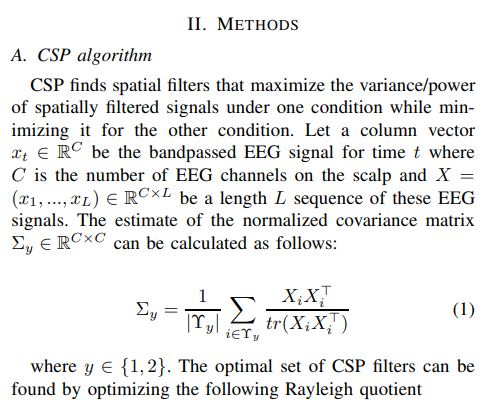

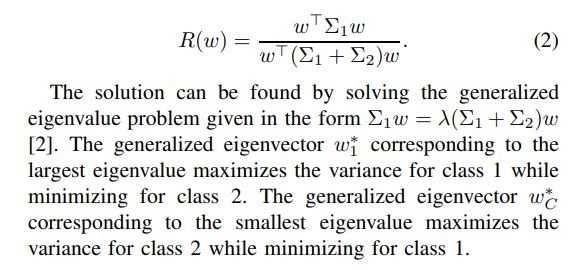